In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers
from scipy.integrate import odeint
import scipy
import pandas as pd

In [4]:
#Type IA supernova
url="https://raw.githubusercontent.com/JuanDDiosRojas/Arts/main/Deep%20Learning%20and%20its%20applications%20to%20cosmology/supernovas.txt"

### Gradient descent
This algorithm is based in the finite difference method.

In [14]:
# 1.Compute the k partial derivative, of a function g(x_1, x_2,...,x_k,...).
def partial(g, k, X):
    h = 1e-10
    Y = np.copy(X)
    X[k - 1] = X[k - 1] + h
    dp = (g(X) - g(Y)) / h
    return dp

# 2.Constructs the gradient vector of a function f evaluating in X, has a bound (cota) to avoid exploding 
#the magnitude of the gradient, but keeping its direction. 
def gradcot(f, X, cota):
    grd = []
    for i in np.arange(0, len(X)):
        ai = partial(f, i + 1, X)
        ai=float(ai)
        if ai<0:
            ai = max(ai, -1*cota)
        else:
            ai = min(ai, cota)
        grd.append(ai)
    return grd

# 3.Performs the iterations of the gradient descent and returns the value X0 for which f reaches its minimum.
#a maximum number of interactions (steps) can be set. An acceptably small magnitude for the gradient as well (tolerance).
#eta its the learning rate of the process and X0 the initial point.
def desgrad(f,X0,eta, steps, cota, tolerance):
    i=0
    while True:
        i=i+1
        X0=X0-eta*np.array(gradcot(f,X0, cota))
        if np.linalg.norm(gradcot(f,X0, cota))<tolerance or i>steps: break  
    return X0


### Modeling the Hubble’s law with a perceptron
This is a dataset of 36 IA supernovas, for which the Hubble relation is found to work well. Although Hubble's law should have an ordinate to the origin of 0, we will fit a straight line $v=rH_0 + b$ with the help of the perceptron.


In [7]:
s=pd.read_csv(url,sep='\s+')
s

,Supernova,Velocidad,Distancia[Mpc],H_0,Sigma
0,SN1990O,9065,134.7,67.3,2.3
1,SN1990T,12012,158.9,75.6,3.1
2,SN1990af,15055,198.6,75.8,2.8
3,SN1991S,16687,238.9,69.8,2.8
4,SN1991U,9801,117.1,83.7,3.4
5,SN1991ag,4124,56.0,73.7,2.9
6,SN1992J,13707,183.9,74.5,3.1
7,SN1992P,7880,121.5,64.8,2.2
8,SN1992ae,22426,274.6,81.6,3.4
9,SN1992ag,7765,102.1,76.1,2.7


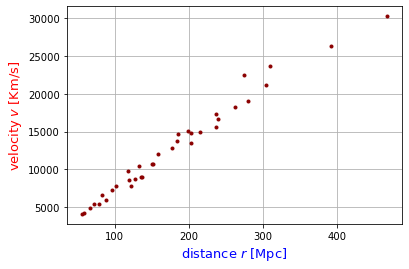

In [10]:
plt.plot(s['Distancia[Mpc]'],s['Velocidad'],'.', color='darkred')
plt.xlabel('distance $r$ [Mpc]',color='b',size=13)
plt.ylabel('velocity $v$ [Km/s]',color='r',size=13)
plt.grid()

In [11]:
#prepare the dataset, and assign a column of "1" to x, to be multiplied by the bias.
r=np.array(s['Distancia[Mpc]'])
v=np.array(s['Velocidad'])
x1=[]
x=r
for i in x:
    i=np.append(i,1.0)
    x1.append(i)
    
x1=np.array(x1)

In [12]:
#we apply the mean square error to the output of the perceptron, when processing the dataset.
def error(W,x=x1,y=v):
    s=0
    for i in range(0,len(y)):
        l=0.5*(y[i]-np.dot(x1[i],W))**2
        s=s+l
    return s

In [22]:
#evaluating in desgrad function
H0,b=desgrad(error,[1,500],eta=0.01,steps=1000,tolerance=1e-8,cota=100.0)
print('The Hubble constant is ',H0)
print('The bias is',b)

The Hubble constant is  68.00000020020342
The bias is 567.0000002002876


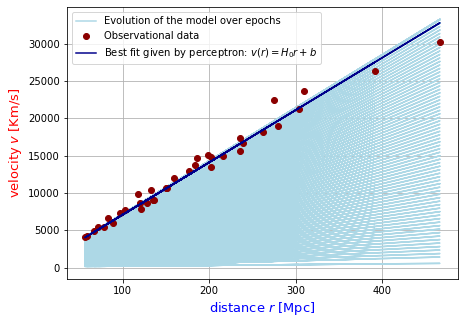

In [41]:
#now, we plot some steps made by learning process of the peerceptron
index=np.arange(2,90,1)
def desgrad1(f,X0,eta, steps, cota, tolerance):
    i=0
    pendientes=[]
    while True:
        i=i+1
        X0=X0-eta*np.array(gradcot(f,X0, cota))
        if np.linalg.norm(gradcot(f,X0, cota))<tolerance or i>steps: break
        if i in index:
            pendientes.append(X0)
    return pendientes

A=desgrad1(error,[1,1],eta=0.01,steps=100,tolerance=1e-8,cota=100.0)

plt.figure(figsize=(7,5))
for a in A:
    m,b=a
    plt.plot(r,m*r+b,color='lightblue')
m1,b1=A[-1]
plt.plot(r,1*r+b,color='lightblue', label='Evolution of the model over epochs')
plt.plot(r,v,'o',label='Observational data',color='darkred')
plt.plot(r,m1*r+b1,label='Best fit given by perceptron: $v(r)=H_0 r+b$',color='darkblue')
plt.xlabel('distance $r$ [Mpc]',color='b',size=13)
plt.ylabel('velocity $v$ [Km/s]',color='r',size=13)
plt.grid()
plt.legend()

# Deep neural networks

In [36]:
#common activation functions

# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2



In [42]:
#algorithm for splitting the dataset into training and validation 
def split(X,Y,porcent): #porcent must be between 0 and 1, it is the asigned porcent to the training dataset.
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    return X_learn,Y_learn,X_val,Y_val

In [43]:
#we define forward propagation for a single hidden layer network, 
#with activation function id(x) at the output layer.
def forward(X,W1,b1,W2,b2,activation):
    z1=np.dot(X,W1)+b1
    a1=activation(z1)
    z2=np.dot(a1,W2)+b2
    a2=z2
    return a2

#"activation" can be replaced for any activation function, like mencioned above

In [44]:
# MSE cost function
def error(C):
    m=len(C)
    e=(1/(2*m))*np.linalg.norm(C)**2
    return e

In [46]:
# we define the neural network or multi layer perceptron
def neuralnet(X,Y,nodes,split_porcent,learning_rate,epochs,activation,dactivation):
    #input, output shapes
    n_inputs=X.shape[1]
    n_output=Y.shape[1]
    
    #training and validation sets
    X_train,Y_train,X_val,Y_val = split(X,Y,split_porcent)
    
    #forward
    W1=np.random.randn(n_inputs,nodes)
    W2=np.random.randn(nodes,n_output)
    b1=np.random.randn(nodes)
    b2=np.random.randn(n_output)
    
    #épocas
    errors=[]
    validation=[]
    for i in range(epochs+1):
        #Forward
        z1=np.dot(X_train,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        
        #backpropagation
        delta2 = a2-Y_train
        delta1 = (delta2).dot(W2.T)*dactivation(z1)
        
        errors.append(error(delta2)) #guardamos el error de cada época

        W2 -= learning_rate * a1.T.dot(delta2)
        b2 -= learning_rate * (delta2).sum(axis=0)

        W1 -= learning_rate * X_train.T.dot(delta1)
        b1 -= learning_rate * (delta1).sum(axis=0)
        print("epoch %d, cost %f" %(int(i),error(delta2)))
        
        #Ahora validamos el modelo
        z1=np.dot(X_val,W1)+b1
        a1=activation(z1)
        z2=np.dot(a1,W2)+b2
        a2=z2
        delta = a2-Y_val
        validation.append(error(delta))
        
    plt.plot(range(i+1),errors,color='darkcyan',label='Training')
    plt.plot(range(i+1),validation,color='darkred',label='Validation')
    plt.grid()
    plt.legend()
    return W1,b1,W2,b2

In [76]:
x=np.random.randint(1,10,size=(100,1))
y=x**2

epoch 0, cost 749.338372
epoch 1, cost 46491.988992
epoch 2, cost 1679.875044
epoch 3, cost 965.422049
epoch 4, cost 955.236301
epoch 5, cost 945.214587
epoch 6, cost 935.354127
epoch 7, cost 925.652190
epoch 8, cost 916.106093
epoch 9, cost 906.713203
epoch 10, cost 897.470931
epoch 11, cost 888.376737
epoch 12, cost 879.428122
epoch 13, cost 870.622635
epoch 14, cost 861.957864
epoch 15, cost 853.431442
epoch 16, cost 845.041043
epoch 17, cost 836.784380
epoch 18, cost 828.659206
epoch 19, cost 820.663314
epoch 20, cost 812.794535
epoch 21, cost 805.050737
epoch 22, cost 797.429824
epoch 23, cost 789.929737
epoch 24, cost 782.548453
epoch 25, cost 775.283982
epoch 26, cost 768.134369
epoch 27, cost 761.097692
epoch 28, cost 754.172062
epoch 29, cost 747.355622
epoch 30, cost 740.646546
epoch 31, cost 734.043040
epoch 32, cost 727.543340
epoch 33, cost 721.145711
epoch 34, cost 714.848447
epoch 35, cost 708.649872
epoch 36, cost 702.548337
epoch 37, cost 696.542221
epoch 38, cost 690.

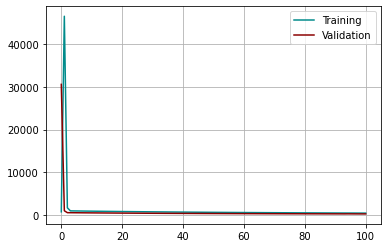

In [88]:
W1,b1,W2,b2=neuralnet(x,y,nodes=30,split_porcent=0.8, learning_rate=0.0001,epochs=100,activation=relu,dactivation=drelu)